In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/iris.data.csv", header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print("Dataset Preview:")
print(df.head())

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
X = df.drop('species', axis=1)
y = df['species']


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
accuracy_list = []
k_values = list(range(1, 21))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print(f"K={k}: Accuracy={accuracy:.4f}")

K=1: Accuracy=0.9667
K=2: Accuracy=1.0000
K=3: Accuracy=1.0000
K=4: Accuracy=1.0000
K=5: Accuracy=1.0000
K=6: Accuracy=1.0000
K=7: Accuracy=1.0000
K=8: Accuracy=1.0000
K=9: Accuracy=1.0000
K=10: Accuracy=1.0000
K=11: Accuracy=1.0000
K=12: Accuracy=1.0000
K=13: Accuracy=1.0000
K=14: Accuracy=1.0000
K=15: Accuracy=1.0000
K=16: Accuracy=1.0000
K=17: Accuracy=1.0000
K=18: Accuracy=0.9667
K=19: Accuracy=0.9667
K=20: Accuracy=0.9667


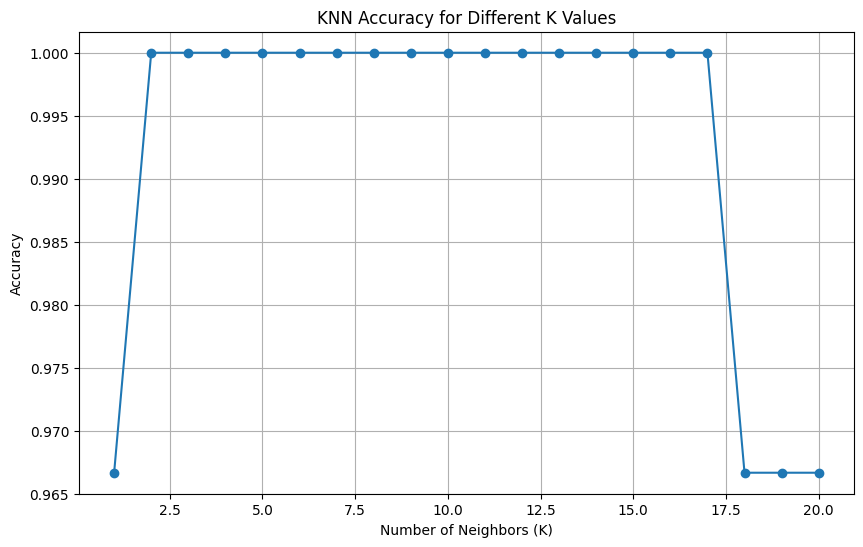

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_list, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [12]:
best_k = k_values[np.argmax(accuracy_list)]
print(f"\nBest K = {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_final_pred = knn_best.predict(X_test)


Best K = 2



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


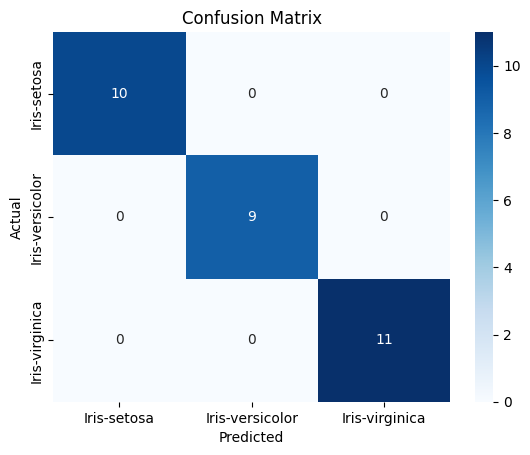

In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_final_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()